## Лабораторна робота № 8 Структура даних граф. Алгоритми на графах.
## Мета: засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.
### Виконав: Яцентюк Євгеній, група: КІ-24-1 

**[GitHub](https://github.com/kefir4ikk)**

## 1. Імпорт

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

## 2. Створення та візуалізація графа (Варіант 23)

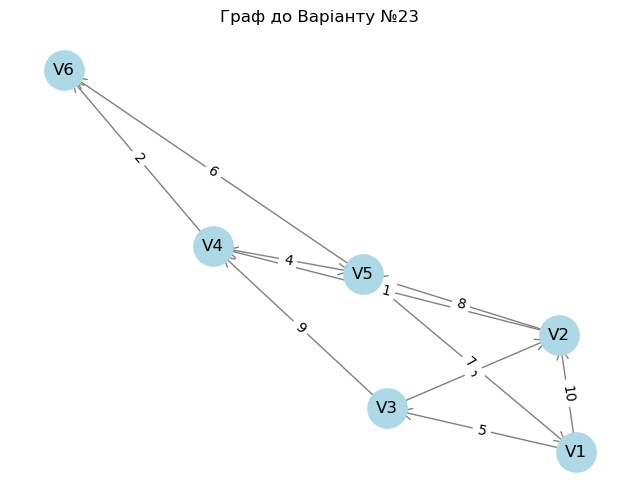

In [24]:
G = nx.DiGraph()

nodes_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']
G.add_nodes_from(nodes_list)
edges_list = [
    ('V1', 'V2', 10),
    ('V1', 'V3', 5),
    ('V2', 'V4', 1),
    ('V2', 'V5', 8),
    ('V3', 'V2', 3),
    ('V3', 'V4', 9),
    ('V4', 'V5', 4),
    ('V4', 'V6', 2),
    ('V5', 'V6', 6),
    ('V5', 'V1', 7) 
]

G.add_weighted_edges_from(edges_list)

plt.figure(figsize=(8, 6)) 
pos = nx.spring_layout(G, seed=42) 

nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12)

nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='->', arrowsize=20)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Граф до Варіанту №23")
plt.axis('off') 
plt.show()

## 3: Пошук найкоротших шляхів (Дейкстра та Беллман-Форд)

In [17]:
start_node = 'V1'

print(f"--- Результати алгоритму Дейкстри (початок у {start_node}) ---")
try:
    d_lengths = nx.single_source_dijkstra_path_length(G, start_node)
    for target, length in d_lengths.items():
        print(f"Шлях до {target}: довжина {length}")
except Exception as e:
    print(f"Помилка: {e}")

print("\n" + "="*30 + "\n")

print(f"--- Результати алгоритму Беллмана-Форда (початок у {start_node}) ---")
try:
    bf_lengths = nx.single_source_bellman_ford_path_length(G, start_node)
    for target, length in bf_lengths.items():
        print(f"Шлях до {target}: довжина {length}")
except Exception as e:
    print("Неможливо виконати (можливо, є від'ємний цикл).")

--- Результати алгоритму Дейкстри (початок у V1) ---
Шлях до V1: довжина 0
Шлях до V3: довжина 5
Шлях до V2: довжина 8
Шлях до V4: довжина 9
Шлях до V6: довжина 11
Шлях до V5: довжина 13


--- Результати алгоритму Беллмана-Форда (початок у V1) ---
Шлях до V1: довжина 0
Шлях до V2: довжина 8
Шлях до V3: довжина 5
Шлях до V4: довжина 9
Шлях до V5: довжина 13
Шлях до V6: довжина 11


## 4: Реалізація DFS (Пошук у глибину)

In [18]:
def dfs_paths(graph, start, goal):
    stack = [(start, [start])] 
    while stack:
        (vertex, path) = stack.pop()
        for next_node in set(graph[vertex]) - set(path):
            if next_node == goal:
                yield path + [next_node]
            else:
                stack.append((next_node, path + [next_node]))


print(f"Усі шляхи DFS від V1 до V6:")
paths_dfs = list(dfs_paths(G, 'V1', 'V6'))
for p in paths_dfs:
    print(p)

Усі шляхи DFS від V1 до V6:
['V1', 'V3', 'V2', 'V5', 'V6']
['V1', 'V3', 'V2', 'V4', 'V6']
['V1', 'V3', 'V2', 'V4', 'V5', 'V6']
['V1', 'V3', 'V4', 'V6']
['V1', 'V3', 'V4', 'V5', 'V6']
['V1', 'V2', 'V5', 'V6']
['V1', 'V2', 'V4', 'V6']
['V1', 'V2', 'V4', 'V5', 'V6']


## 5: Реалізація BFS (Пошук у ширину)

In [19]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])] 
    while queue:
        (vertex, path) = queue.pop(0) 
        for next_node in set(graph[vertex]) - set(path):
            if next_node == goal:
                yield path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))

print(f"Усі шляхи BFS від V1 до V6:")
paths_bfs = list(bfs_paths(G, 'V1', 'V6'))
for p in paths_bfs:
    print(p)

Усі шляхи BFS від V1 до V6:
['V1', 'V2', 'V4', 'V6']
['V1', 'V2', 'V5', 'V6']
['V1', 'V3', 'V4', 'V6']
['V1', 'V2', 'V4', 'V5', 'V6']
['V1', 'V3', 'V4', 'V5', 'V6']
['V1', 'V3', 'V2', 'V4', 'V6']
['V1', 'V3', 'V2', 'V5', 'V6']
['V1', 'V3', 'V2', 'V4', 'V5', 'V6']


## Контрольні питання

### 1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.

**Граф** — це математична структура, що складається з множини вершин (V) та множини ребер (E), які з’єднують пари вершин.
Формально граф задається як G = (V, E).

**Приклади застосування:**
- дорожні мережі (міста — вершини, дороги — ребра);
- комп’ютерні мережі (маршрутизатори та канали зв’язку);
- моделі соціальних зв’язків (користувачі та їх відносини);
- навігаційні задачі та маршрутизація;
- рекомендаційні системи (користувач — товар);
- структура вебсайтів (сторінки і гіперпосилання).

### 2. Які основні види графів існують? Відмінності між орієнтованими і неорієнтованими графами.

**Основні види графів:**
- орієнтовані (диграфи);
- неорієнтовані;
- зважені та незважені;
- прості та мультіграфи;
- циклічні та ациклічні (DAG);
- повні та розріджені.

**Різниця між орієнтованими і неорієнтованими:**
- У орієнтованому графі ребра мають напрям, тобто `(u → v)` не означає `(v → u)`.
- У неорієнтованому графі ребро двонаправлене, тому `(u, v)` означає зв’язок в обидві сторони.

### 3. Як можна представити граф у пам’яті комп’ютера? Опишіть структури даних, які використовуються для зберігання графів.
Найпоширеніші способи:

**1. Матриця суміжності**

Квадратна таблиця n×n, де:
- 1 або вага означає наявність ребра,
- 0 — його відсутність.
Переваги: швидка перевірка наявності ребра.
Недоліки: займає багато пам’яті (O(n²)).

**2. Список суміжності**
Для кожної вершини зберігається список її сусідів.
Найпопулярніше представлення через словник.

Переваги: економія пам’яті на розріджених графах.
Недолік: повільніша перевірка наявності конкретного ребра.

**3. Список ребер**
Зберігається перелік ребер у вигляді кортежів `(u, v, вага)`.

Зручно для алгоритмів на ребрах, наприклад Беллмана–Форда.

### 4. Як працює алгоритм пошуку в ширину (BFS)? Приклади застосування.

**BFS** — це обхід графа, при якому вершини відвідуються "за рівнями".
Алгоритм використовує чергу (FIFO).

Основна ідея:
1. Починаємо зі стартової вершини.
2. Додаємо всіх сусідів у чергу.
3. Потім обробляємо їх сусідів.
4. Продовжуємо доти, доки черга не порожня.

**Де застосовується:**
- пошук найкоротшого шляху в незваженому графі;
- пошук шляхів у лабіринтах;
- визначення компонент зв’язності;
- алгоритми поширення сигналу/повідомлень;
- “дистанція” в соцмережах (лінія друзів).

### 5. Що таке DFS? Чим він відрізняється від BFS? Де використовується.

**DFS** — це обхід графа в глибину.
Ідея алгоритму: рухатися по ребрах максимально далеко, доки можливо, а потім “відкотитися” назад. Реалізується або рекурсією, або стеком.

**Відмінності з BFS:**
- BFS іде по рівнях (ширина), DFS — по одному шляху до кінця (глибина).
- BFS підходить для найкоротших шляхів у незважених графах.
- DFS добре підходить для структурного аналізу графа.

**Де використовується DFS:**
- виявлення циклів у графах;
- топологічне сортування (DAG);
- пошук компонент зв’язності;
- перевірка двочастковості графа;
- генерація лабіринтів.

### 6. Алгоритм Дейкстри. Умови роботи.

Алгоритм Дейкстри знаходить найкоротші шляхи від заданої вершини до всіх інших у зваженому графі.

Ідея:

1. У кожної вершини є поточна «найкраща» відстань.
2. Спочатку вона нескінченність, окрім стартової (0).
3. На кожному кроці вибираємо вершину з найменшою відстанню.
4. Оновлюємо відстані до її сусідів, якщо знайшли коротший шлях.
5. Повторюємо, доки всі вершини не будуть опрацьовані.

Умови коректної роботи:
- Всі ваги ребер повинні бути невід’ємними.
- Якщо є негативні ваги — Дейкстра дає неправильний результат.